# Zomato data analysis project

## Step 1 - Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Create the data frame

In [2]:
dataframe = pd.read_csv(r'G:\Data Analyst Projects\Python Projects\Zomato data .csv')
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Convert the data type of column - rate

In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Restaurant

In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of restaurant')

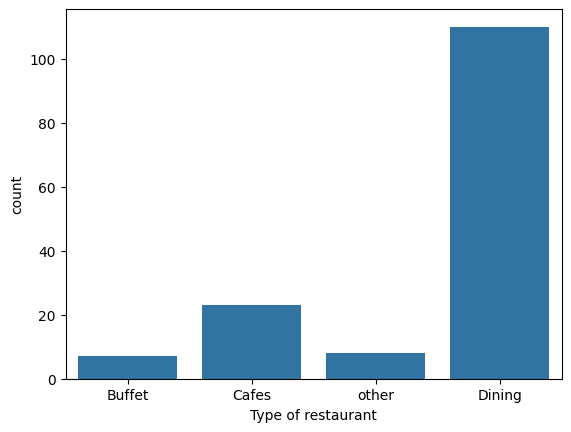

In [16]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

### Conclusion - Majority of the restaurant falls in dinning category

### Dining restaurant are preferred by larger number of individuals

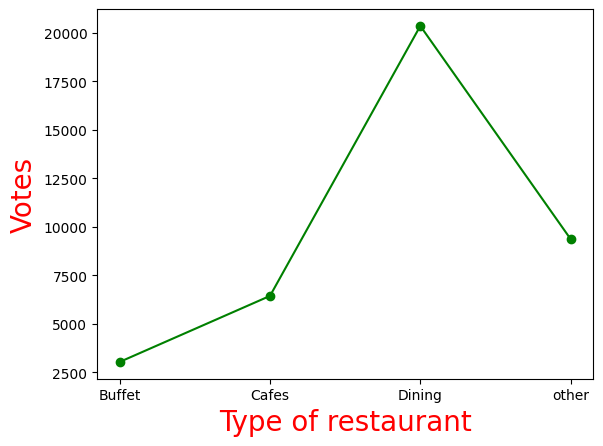

In [23]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurant",c='red',size=20)
plt.ylabel("Votes",c='red',size=20)
plt.show()

### Conclusion - Dinning restaurants has received maximum votes

### The majority of restaurants received ratings 

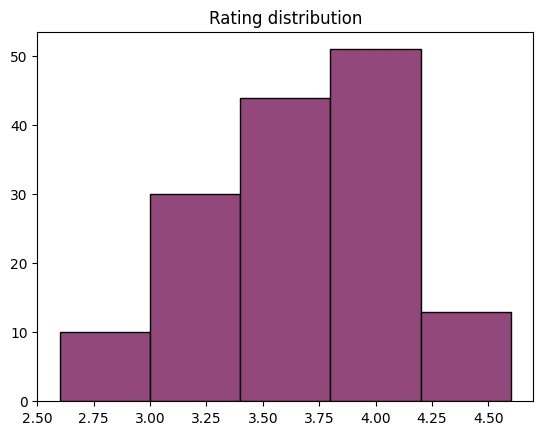

In [21]:
plt.hist(dataframe['rate'],bins=5,color='#92487A',edgecolor='black')
plt.title("Rating distribution")
plt.show()

### Conclusion - The majority of restaurant received ratings ranging from 3.5 to 4.

### Average order spending by couples

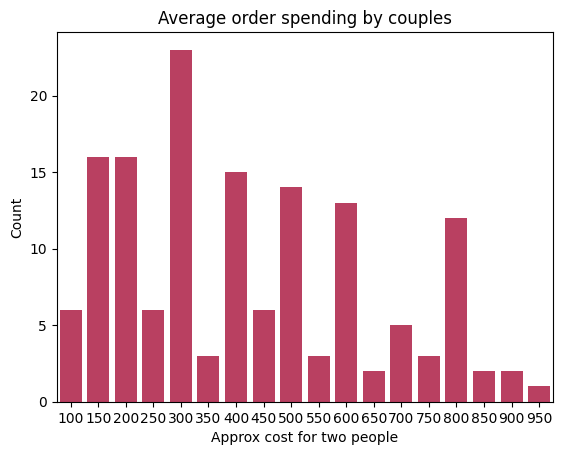

In [59]:
couple_date=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_date,color='#CD2C58')
plt.xlabel("Approx cost for two people")
plt.ylabel("Count")
plt.title("Average order spending by couples")
plt.show()

### Conclusion - The majority of couples prefer restaurants with an approximate cost of 300 rupees 

### Which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

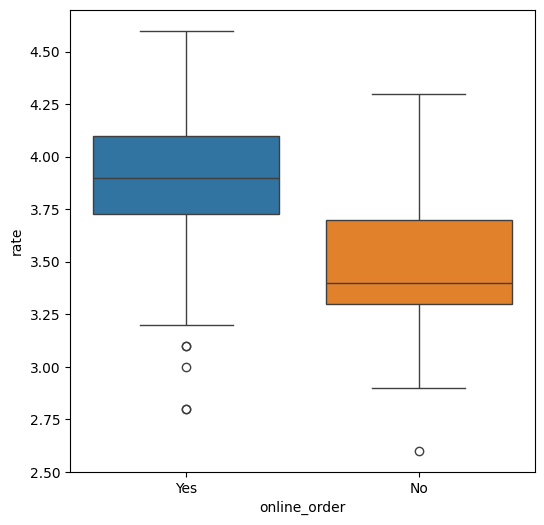

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe,hue='online_order')

### Conclusion - Offline order received lower rating in comparison to online order

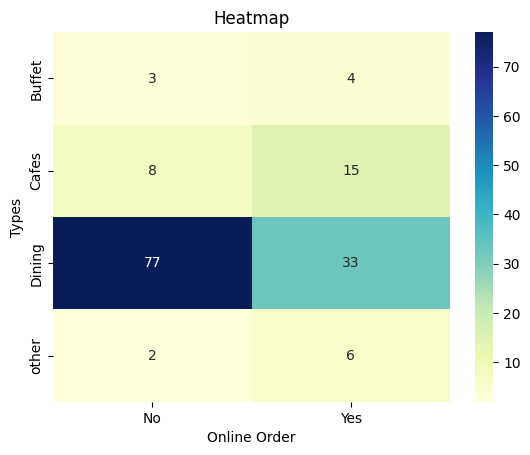

In [66]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d',cmap='YlGnBu')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Types")
plt.show()

### CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.